# CNN con Keras Core

Utilizaremos keras core para clasificar imagenes de la base de datos MNIST

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
!pip install -q keras-core
os.environ["KERAS_BACKEND"] = "torch"
# Nota: importar keras luego de elegir el backend torch, tf, jax
import keras_core as keras

Using PyTorch backend.


Utlizaremos el dataset simplificado de MNIST de https://www.kaggle.com/datasets/oddrationale/mnist-in-csv, a continuacion lo descomprimimos en el directorio ./data/mnist/extracted/

In [3]:
#import zipfile
#with zipfile.ZipFile("./data/mnist/mnist_train.csv.zip", 'r') as zip_ref:
#    zip_ref.extractall("./data/mnist/extracted/")
#with zipfile.ZipFile("./data/mnist/mnist_test.csv.zip", 'r') as zip_ref:
#    zip_ref.extractall("./data/mnist/extracted/")

In [ ]:
import requests, zipfile, io
r = requests.get("https://github.com/amiune/freecodingtour/raw/main/cursos/espanol/deeplearning/data/mnist/mnist_train.csv.zip")
with zipfile.ZipFile(io.BytesIO(r.content), 'r') as zip_ref:
    zip_ref.extractall("./data/mnist/extracted/")
r = requests.get("https://github.com/amiune/freecodingtour/raw/main/cursos/espanol/deeplearning/data/mnist/mnist_test.csv.zip")
with zipfile.ZipFile(io.BytesIO(r.content), 'r') as zip_ref:
    zip_ref.extractall("./data/mnist/extracted/")

Cargo los datasets de train y test y los convierto a la forma original de la imagen 28x28 pixeles

In [22]:
train = pd.read_csv("./data/mnist/extracted/mnist_train.csv")


x_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values

# Hacer que cada pixel este entre 0 y 1
x_train = x_train.astype("float32") / 255

# Cambiar la forma de unidimensional de (784) a bidimensional (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [23]:
print(x_train[0].shape)
print(y_train[0])

(28, 28, 1)
5


In [24]:
# Convertir labels a one-hot encoding
y_train = keras.utils.to_categorical(y_train)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

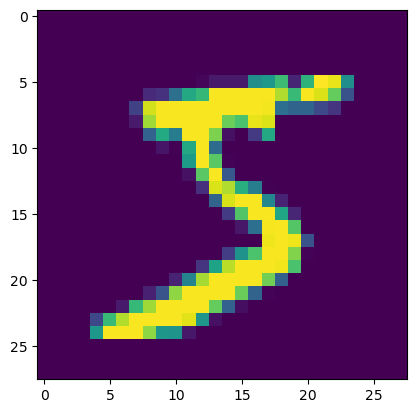

In [26]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0], interpolation='nearest')
plt.show()

In [27]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
60000 train samples


Definimos la arquitectura de la CNN

In [28]:
num_classes = 10
input_shape = (28, 28, 1)

model = keras.models.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

Compilamos el modelo

In [29]:
model.compile(optimizer='adam',
              #loss="sparse_categorical_crossentropy",#para y=numero
              loss="categorical_crossentropy",#para y=one_hot_encoding
              metrics=['accuracy'])

Entrenamos el modelo

In [30]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=3,
    validation_split=0.1,
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8037 - loss: 0.6358 - val_accuracy: 0.9763 - val_loss: 0.0853
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9480 - loss: 0.1813 - val_accuracy: 0.9805 - val_loss: 0.0693
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9602 - loss: 0.1362 - val_accuracy: 0.9842 - val_loss: 0.0594
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9634 - loss: 0.1213 - val_accuracy: 0.9858 - val_loss: 0.0560
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9697 - loss: 0.0994 - val_accuracy: 0.9860 - val_loss: 0.0537


Ahora veamos como funciona la prediccion:

In [31]:
test = pd.read_csv("./data/mnist/extracted/mnist_test.csv")

x_test = test.iloc[:,1:].values
y_test = test.iloc[:,0].values

# Hacer que cada pixel este entre 0 y 1
x_test = x_test.astype("float32") / 255

# Cambiar la forma de unidimensional de (784) a bidimensional (28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

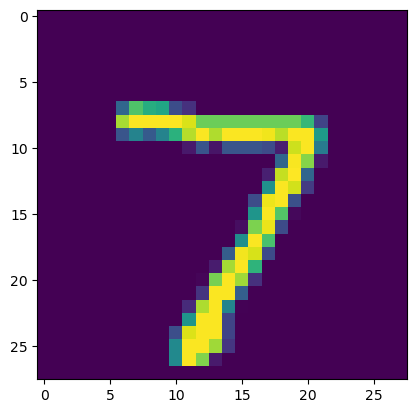

In [32]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0], interpolation='nearest')
plt.show()

In [33]:
predictions = model.predict(x_test[0:1,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [34]:
predictions

array([[1.7192811e-11, 3.8012554e-10, 1.3435869e-08, 2.6205747e-08,
        4.7637949e-11, 4.5802633e-12, 4.0442001e-14, 9.9999976e-01,
        2.6580352e-10, 1.5983551e-07]], dtype=float32)

In [35]:
predictions = predictions.argmax(axis=-1).flatten()

In [36]:
predictions

array([7])

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/deeplearning/deeplearning.html)